<h1 align=center>Pancreatic Cancer Prediction</h1>
<style>
        h1 {
            color: white;
        }
        h1:hover {
            color: red;
        }

<p align=center>
This dataset is designed for predicting pancreatic cancer outcomes based on patient demographics, medical history, risk factors, symptoms, and treatments. It incorporates real-world biases such as late-stage diagnosis prevalence, survival rate disparities, and socioeconomic influences.<br>This dataset can be used for machine learning models, survival analysis, and healthcare policy assessments.
</p>

# EDA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# loading and vewing the data set
df = pd.read_csv("pancreatic_cancer_prediction_sample.csv")
df.head()

,Country,Age,Gender,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,...,Stage_at_Diagnosis,Survival_Time_Months,Treatment_Type,Survival_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Processed_Food,Access_to_Healthcare,Urban_vs_Rural,Economic_Status
0,Canada,64,Female,0,0,0,0,0,0,0,...,Stage III,13,Surgery,0,0,Medium,Low,High,Urban,Low
1,South Africa,77,Male,1,1,0,0,0,0,0,...,Stage III,13,Chemotherapy,0,1,Medium,Medium,Medium,Urban,Low
2,India,71,Female,0,0,0,0,0,0,0,...,Stage IV,3,Chemotherapy,1,0,Medium,High,Low,Rural,Middle
3,Germany,56,Male,0,0,0,0,1,0,1,...,Stage IV,6,Radiation,0,1,Low,Low,Medium,Rural,Middle
4,United States,82,Female,0,0,0,0,1,0,0,...,Stage IV,9,Chemotherapy,1,0,Low,Medium,Medium,Rural,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        50000 non-null  object
 1   Age                            50000 non-null  int64 
 2   Gender                         50000 non-null  object
 3   Smoking_History                50000 non-null  int64 
 4   Obesity                        50000 non-null  int64 
 5   Diabetes                       50000 non-null  int64 
 6   Chronic_Pancreatitis           50000 non-null  int64 
 7   Family_History                 50000 non-null  int64 
 8   Hereditary_Condition           50000 non-null  int64 
 9   Jaundice                       50000 non-null  int64 
 10  Abdominal_Discomfort           50000 non-null  int64 
 11  Back_Pain                      50000 non-null  int64 
 12  Weight_Loss                    50000 non-null  int64 
 13  D

In [4]:
df.describe()

,Age,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,Abdominal_Discomfort,Back_Pain,Weight_Loss,Development_of_Type2_Diabetes,Survival_Time_Months,Survival_Status,Alcohol_Consumption
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,64.540940,0.299540,0.248260,0.199980,0.099300,0.151680,0.049440,0.199220,0.296500,0.252860,0.349980,0.196220,13.898040,0.128440,0.303460
std,9.973847,0.458061,0.432008,0.399989,0.299067,0.358714,0.216787,0.399418,0.456719,0.434656,0.476968,0.397141,11.272151,0.334582,0.459757
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
75%,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,1.000000,1.000000


In [5]:
df.columns

Index(['Country', 'Age', 'Gender', 'Smoking_History', 'Obesity', 'Diabetes',
       'Chronic_Pancreatitis', 'Family_History', 'Hereditary_Condition',
       'Jaundice', 'Abdominal_Discomfort', 'Back_Pain', 'Weight_Loss',
       'Development_of_Type2_Diabetes', 'Stage_at_Diagnosis',
       'Survival_Time_Months', 'Treatment_Type', 'Survival_Status',
       'Alcohol_Consumption', 'Physical_Activity_Level', 'Diet_Processed_Food',
       'Access_to_Healthcare', 'Urban_vs_Rural', 'Economic_Status'],
      dtype='object')

### Checking for missing values

In [6]:
df.isna().sum()

Country                          0
Age                              0
Gender                           0
Smoking_History                  0
Obesity                          0
Diabetes                         0
Chronic_Pancreatitis             0
Family_History                   0
Hereditary_Condition             0
Jaundice                         0
Abdominal_Discomfort             0
Back_Pain                        0
Weight_Loss                      0
Development_of_Type2_Diabetes    0
Stage_at_Diagnosis               0
Survival_Time_Months             0
Treatment_Type                   0
Survival_Status                  0
Alcohol_Consumption              0
Physical_Activity_Level          0
Diet_Processed_Food              0
Access_to_Healthcare             0
Urban_vs_Rural                   0
Economic_Status                  0
dtype: int64

no missing values in the dataset

### Checking for unique value in each columns

In [7]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}\n")

Country : ['Canada' 'South Africa' 'India' 'Germany' 'United States' 'Australia'
 'China' 'United Kingdom' 'Brazil']

Age : [64 77 71 56 82 49 67 50 53 68 75 79 60 58 74 78 84 70 69 59 61 57 51 73
 62 65 45 76 90 47 72 80 55 63 66 52 54 38 48 81 42 85 36 35 44 87 30 46
 83 40 86 88 41 34 43 39 89 37 33 31 32]

Gender : ['Female' 'Male']

Smoking_History : [0 1]

Obesity : [0 1]

Diabetes : [0 1]

Chronic_Pancreatitis : [0 1]

Family_History : [0 1]

Hereditary_Condition : [0 1]

Jaundice : [0 1]

Abdominal_Discomfort : [0 1]

Back_Pain : [0 1]

Weight_Loss : [0 1]

Development_of_Type2_Diabetes : [0 1]

Stage_at_Diagnosis : ['Stage III' 'Stage IV' 'Stage II' 'Stage I']

Survival_Time_Months : [13  3  6  9  4  8 12 14  1 35  7 11 10 58  5 20 22 21 16 29 31  2 17 49
 54 19 18 27 23 15 28 26 36 42 45 32 56 30 33 25 53 24 37 40 43 34 44 57
 47 41 52 39 59 55 48 51 50 46 38]

Treatment_Type : ['Surgery' 'Chemotherapy' 'Radiation']

Survival_Status : [0 1]

Alcohol_Consumption : [0 1]

Physi

In [8]:
df_cleaned = df.drop(columns=["Country", "Stage_at_Diagnosis", "Survival_Time_Months"])

In [11]:
categorical_features = ["Gender", "Treatment_Type", "Physical_Activity_Level", 
                        "Diet_Processed_Food", "Access_to_Healthcare", 
                        "Urban_vs_Rural", "Economic_Status"]

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Save encoders for future use

## Graphs

In [22]:
sns.set(style="whitegrid")

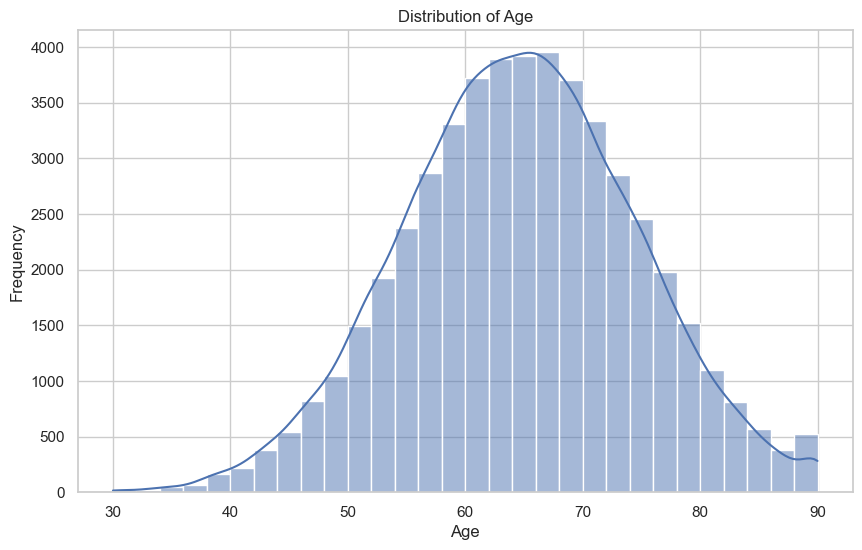

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

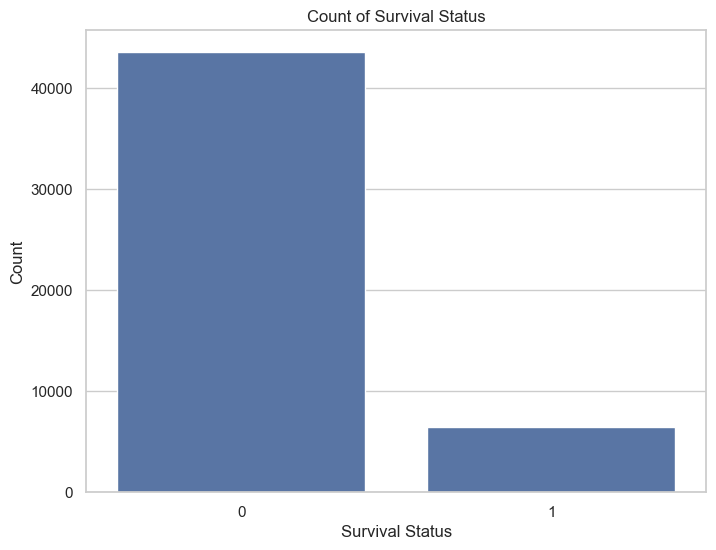

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survival_Status', data=df)
plt.title('Count of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

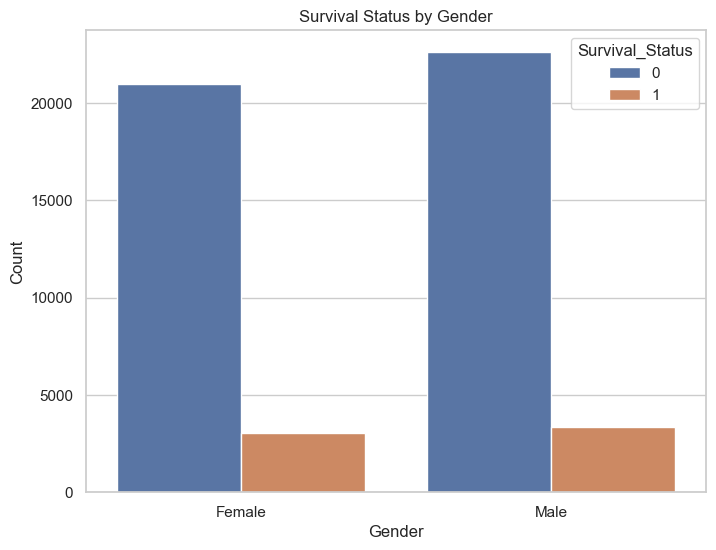

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Survival_Status', data=df)
plt.title('Survival Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

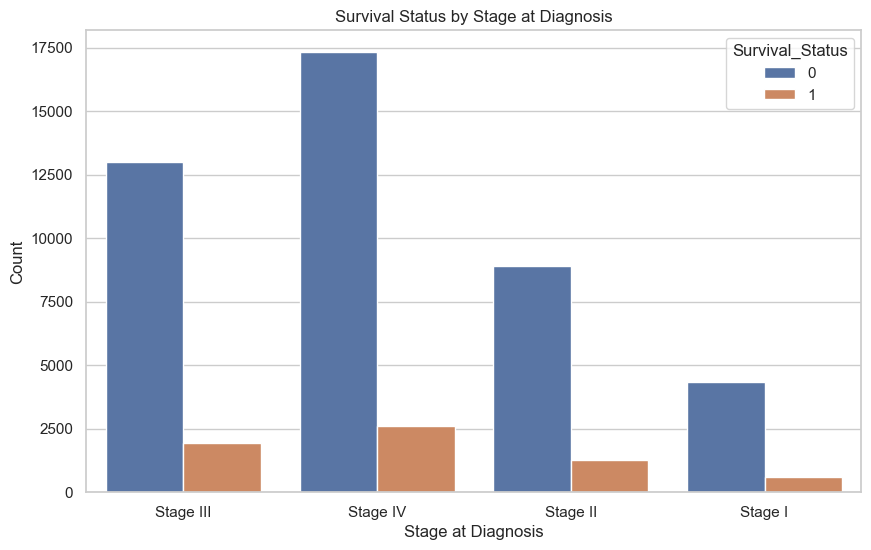

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stage_at_Diagnosis', hue='Survival_Status', data=df)
plt.title('Survival Status by Stage at Diagnosis')
plt.xlabel('Stage at Diagnosis')
plt.ylabel('Count')
plt.show()

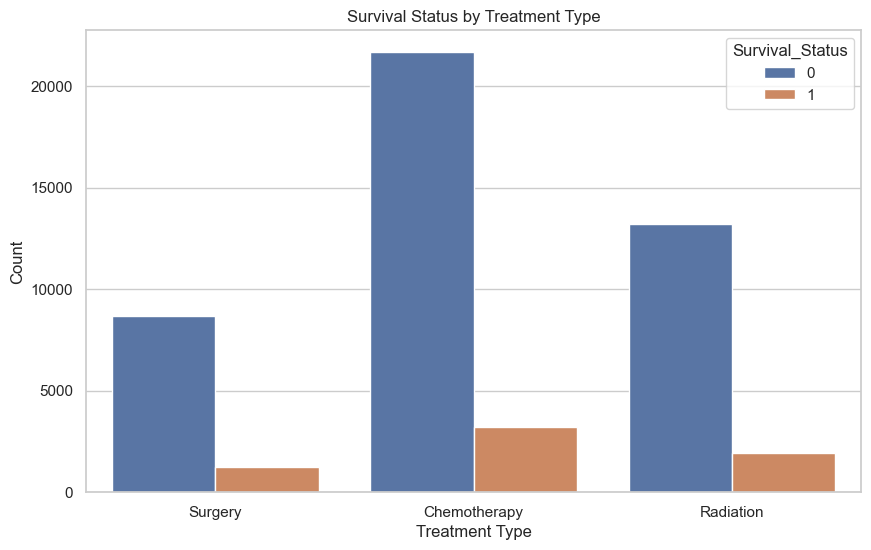

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Treatment_Type', hue='Survival_Status', data=df)
plt.title('Survival Status by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.show()

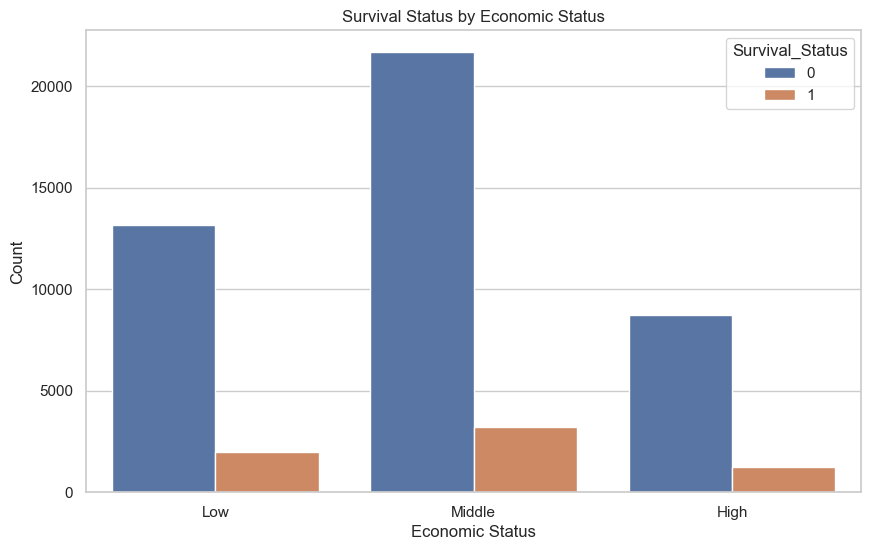

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Economic_Status', hue='Survival_Status', data=df)
plt.title('Survival Status by Economic Status')
plt.xlabel('Economic Status')
plt.ylabel('Count')
plt.show()

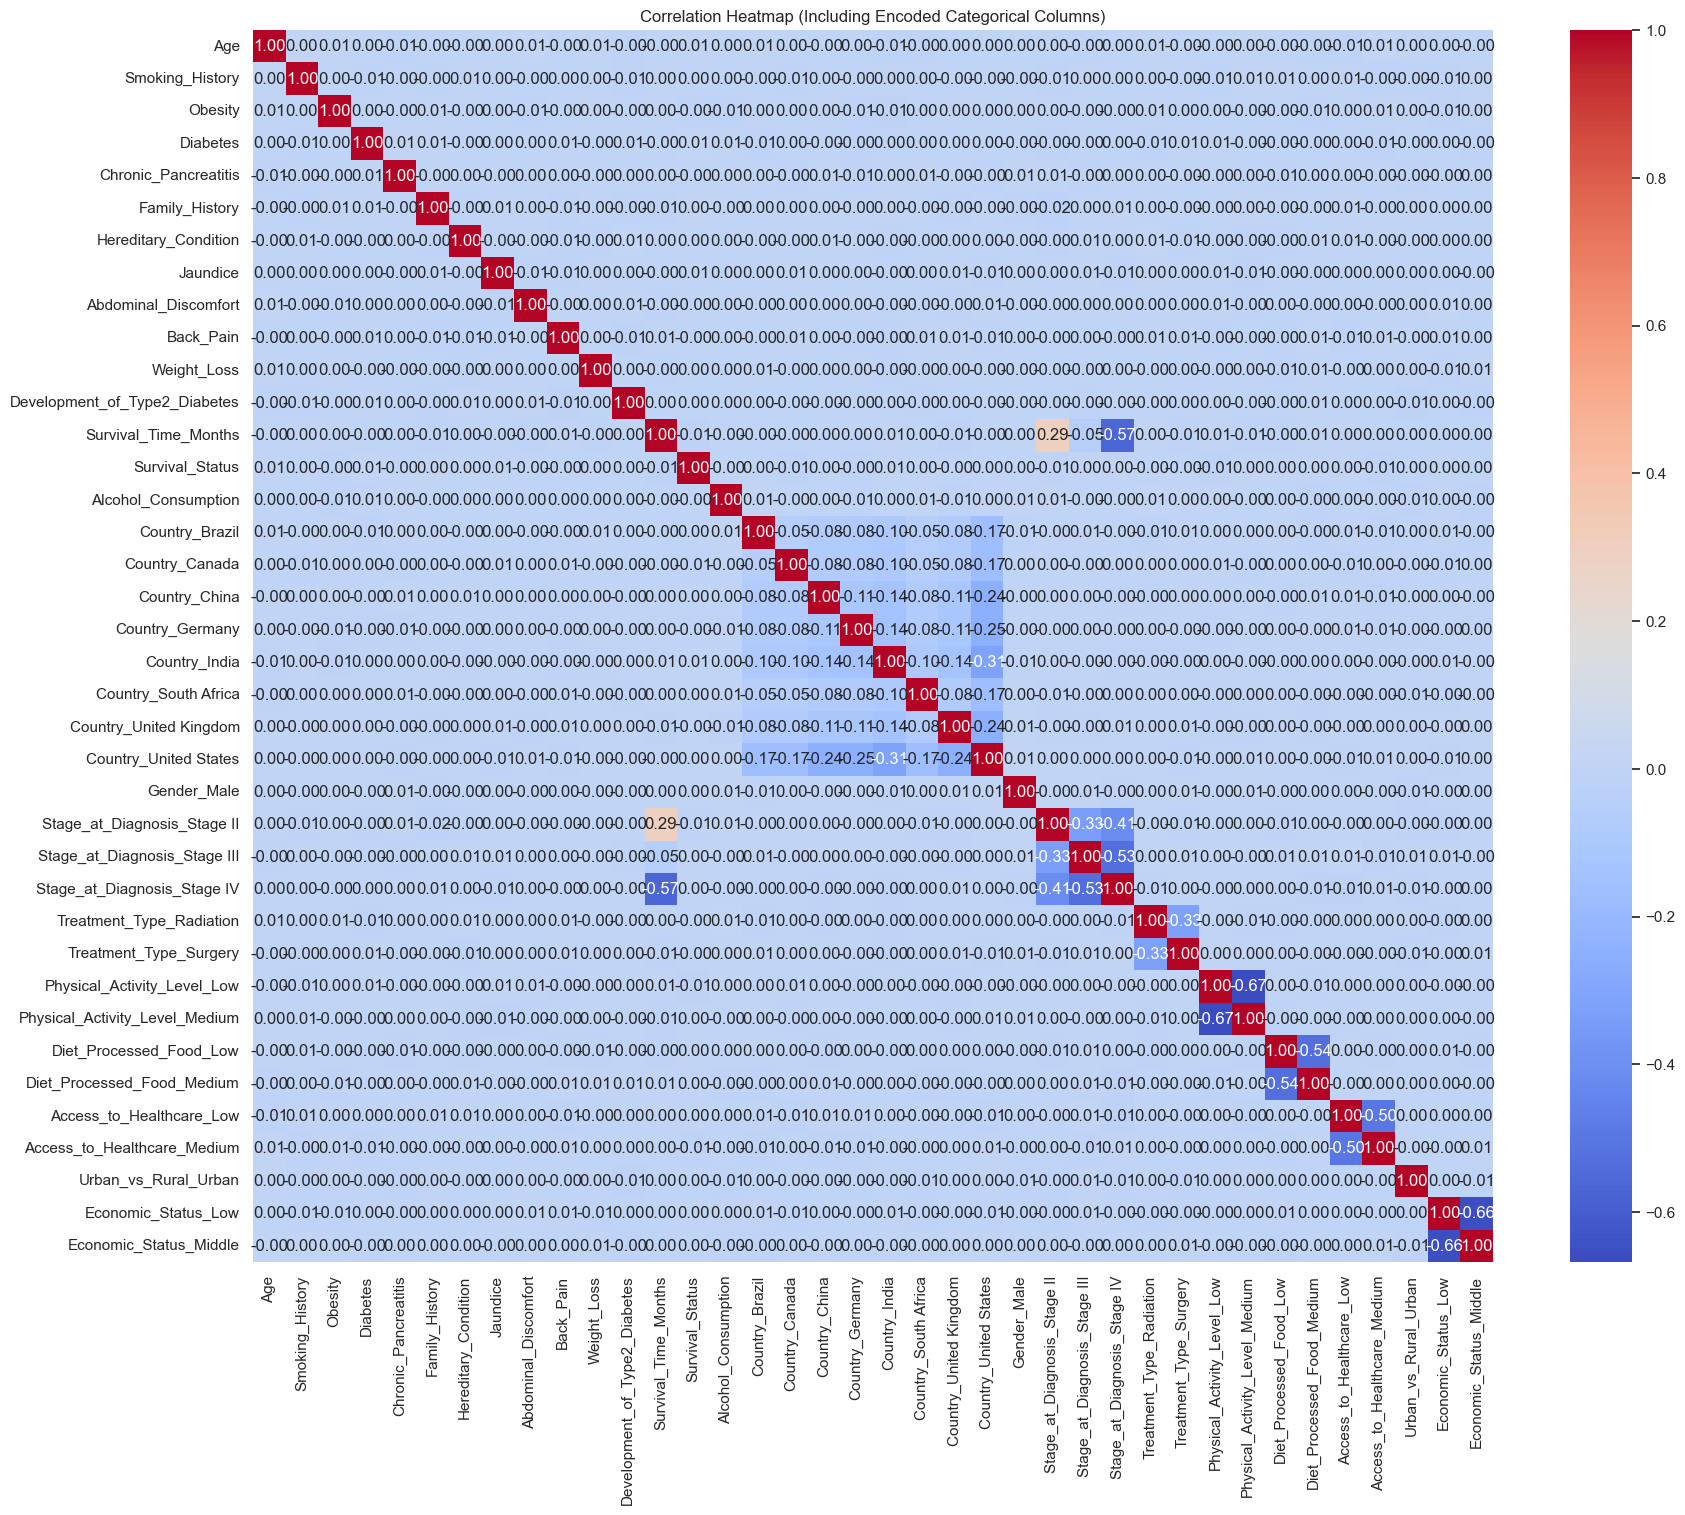

In [29]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Generate the correlation matrix
corr_matrix_encoded = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Including Encoded Categorical Columns)')
plt.show()

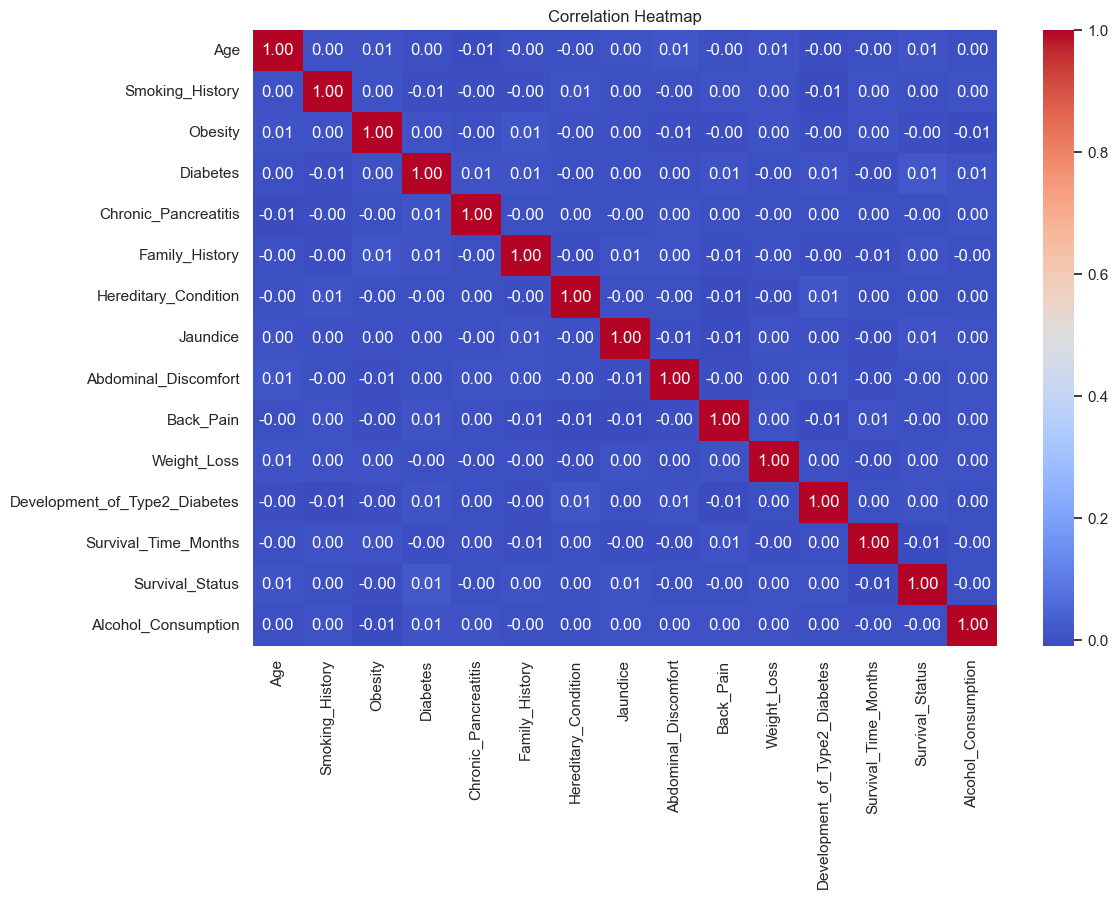

In [31]:
numeric_df = df_encoded.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

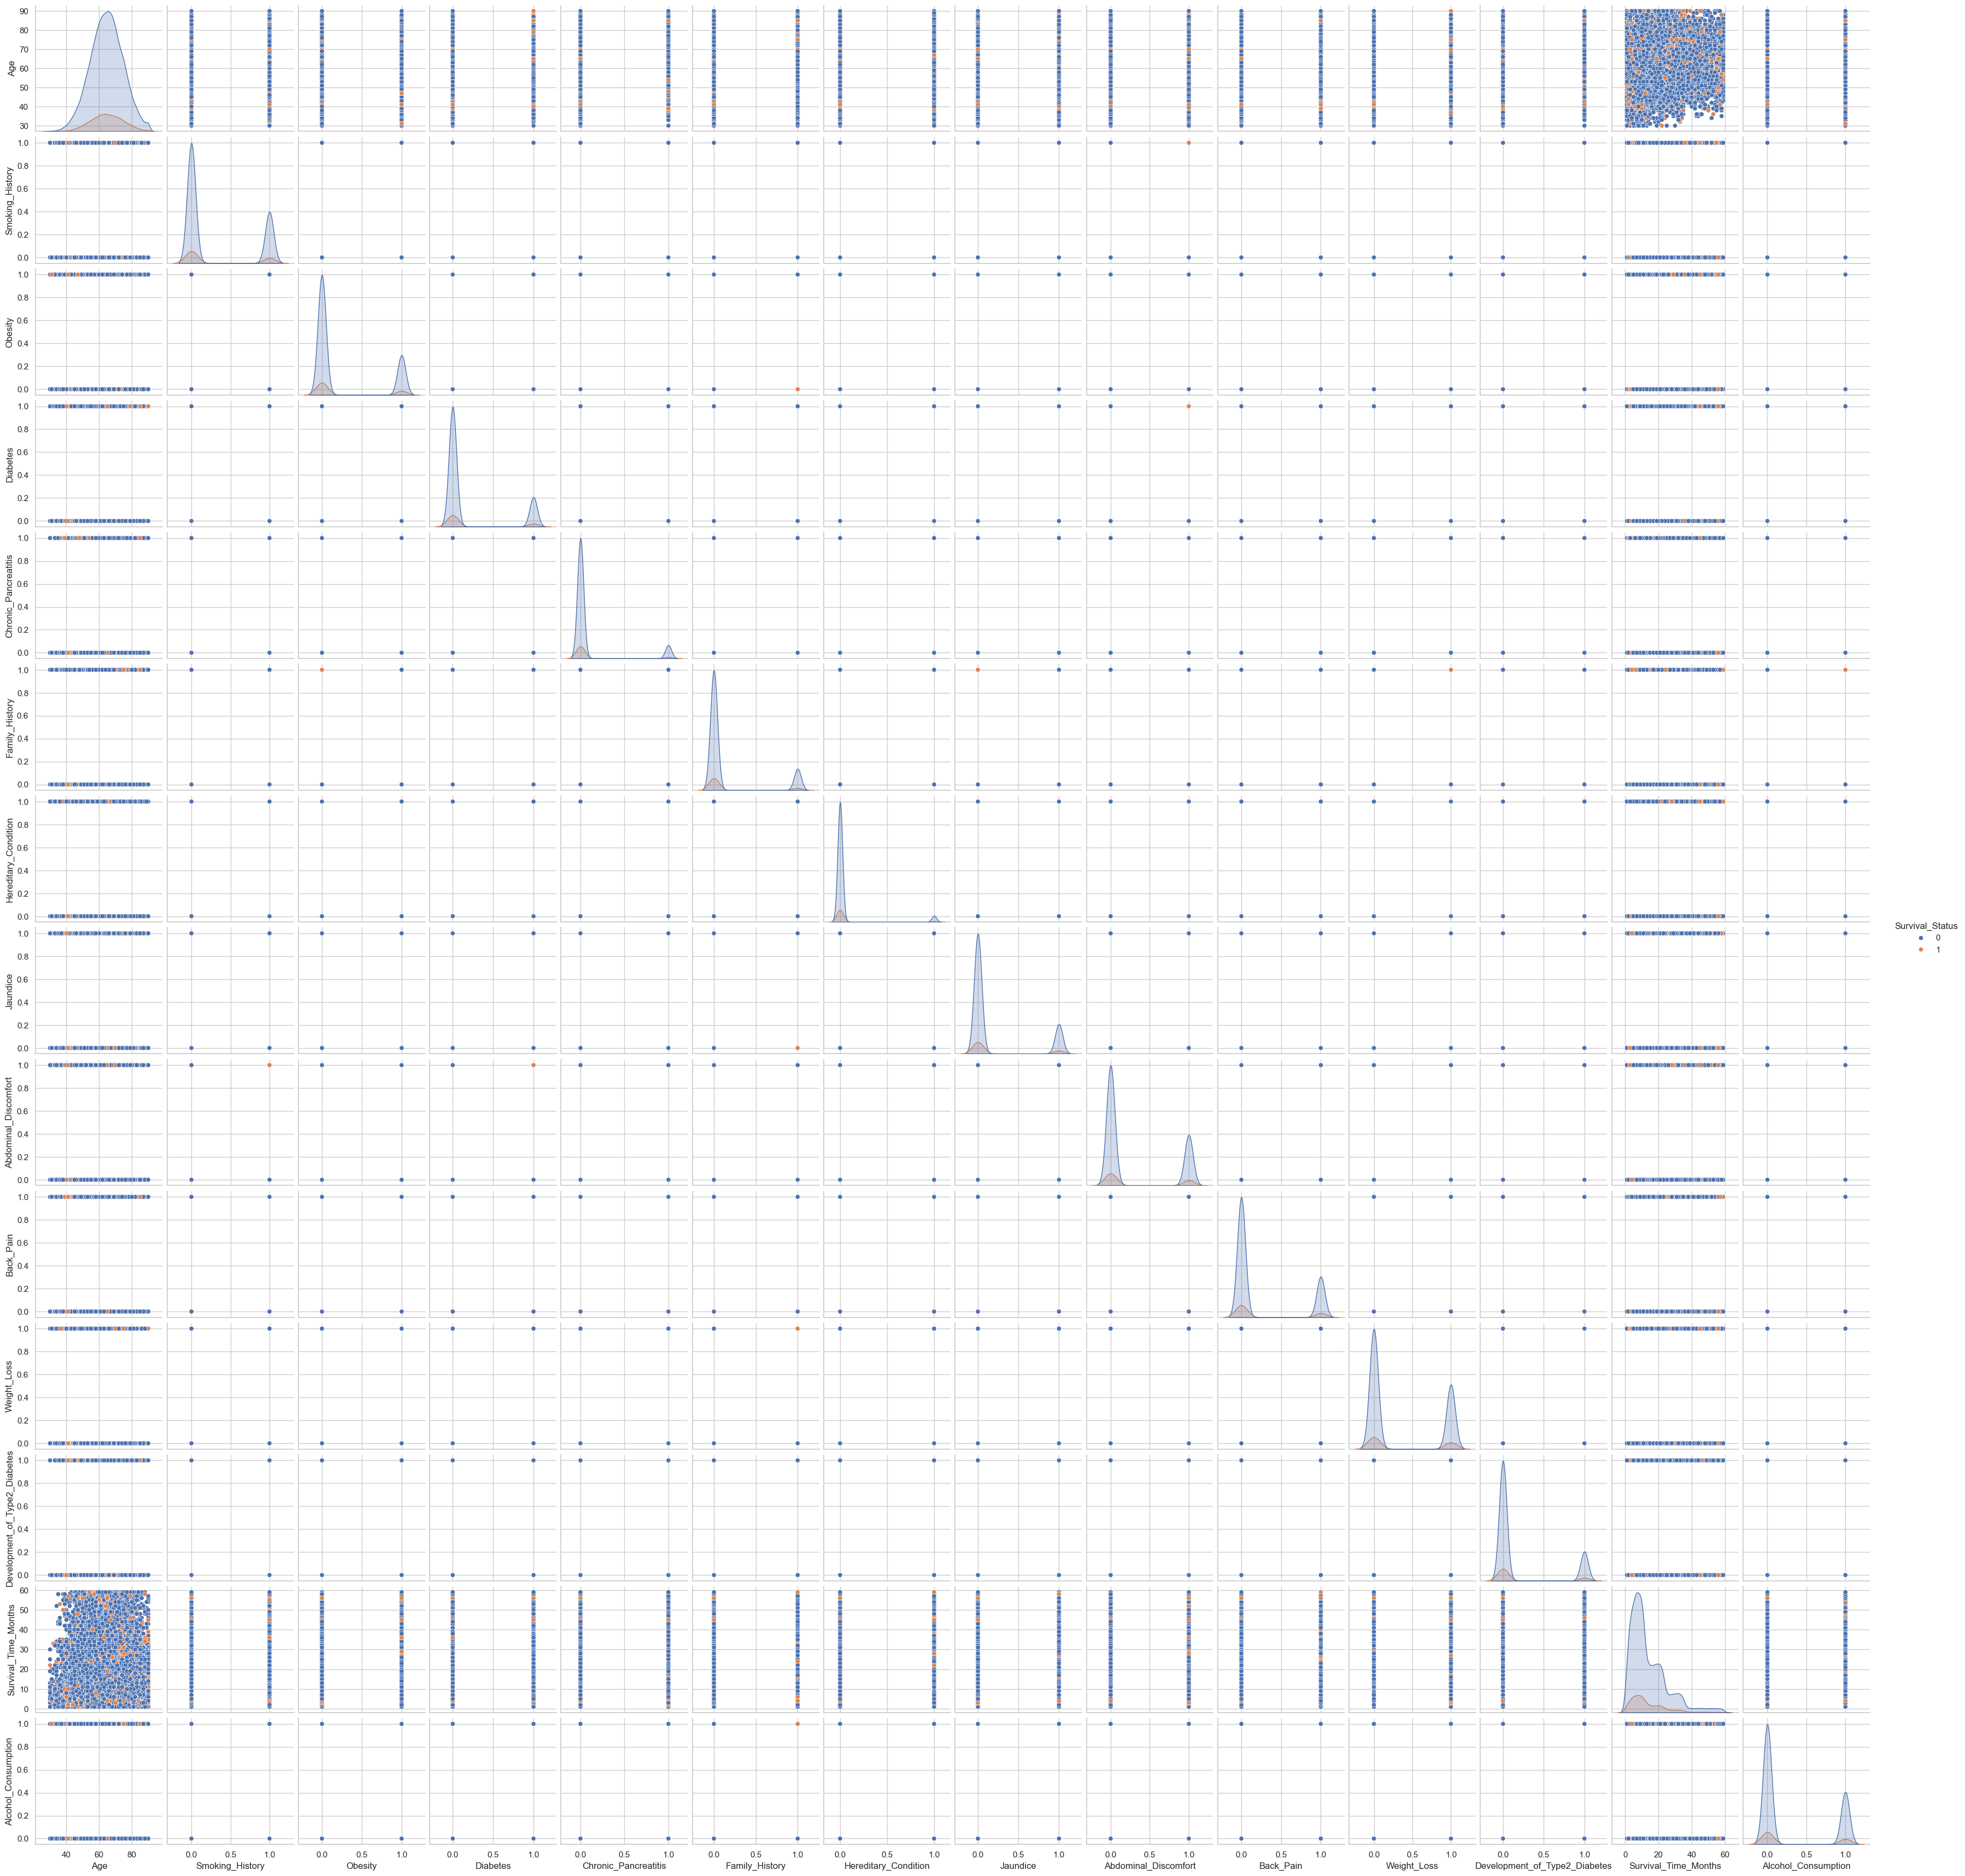

In [30]:
sns.pairplot(df, hue='Survival_Status')
plt.show()

# Model Selection and traning it.

In [12]:
# Separate features and target variable
X = df_cleaned.drop(columns=["Survival_Status"])
y = df_cleaned["Survival_Status"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Models
defined_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


Training Logistic Regression...
Accuracy for Logistic Regression: 0.8730
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      8730
           1       0.00      0.00      0.00      1270

    accuracy                           0.87     10000
   macro avg       0.44      0.50      0.47     10000
weighted avg       0.76      0.87      0.81     10000



/Users/kushangshah/Documents/GitHub/Pancreatic-Cancer-Prediction/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kushangshah/Documents/GitHub/Pancreatic-Cancer-Prediction/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kushangshah/Documents/GitHub/Pancreatic-Cancer-Prediction/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

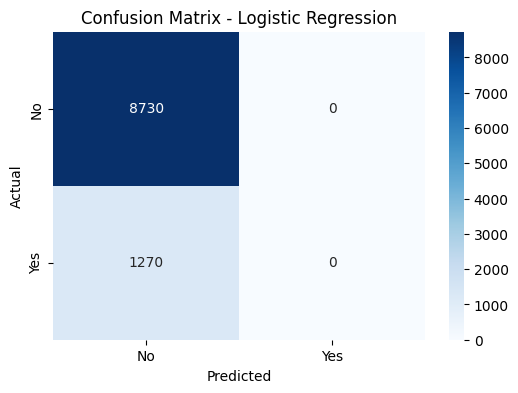


Training Random Forest...
Accuracy for Random Forest: 0.8689
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8730
           1       0.08      0.00      0.01      1270

    accuracy                           0.87     10000
   macro avg       0.48      0.50      0.47     10000
weighted avg       0.77      0.87      0.81     10000



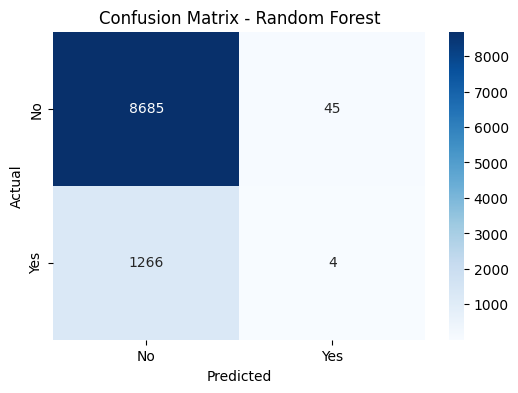

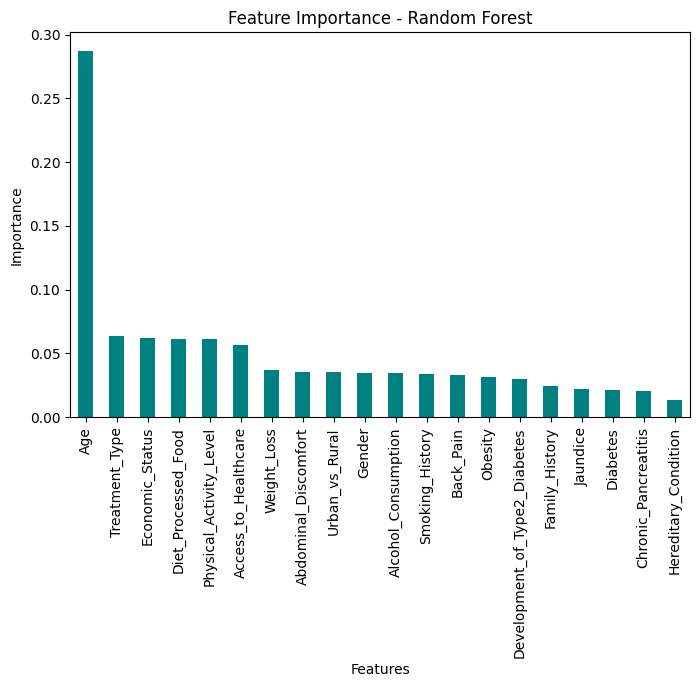


Training XGBoost...


/Users/kushangshah/Documents/GitHub/Pancreatic-Cancer-Prediction/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [16:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for XGBoost: 0.8703
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      8730
           1       0.06      0.00      0.00      1270

    accuracy                           0.87     10000
   macro avg       0.47      0.50      0.47     10000
weighted avg       0.77      0.87      0.81     10000



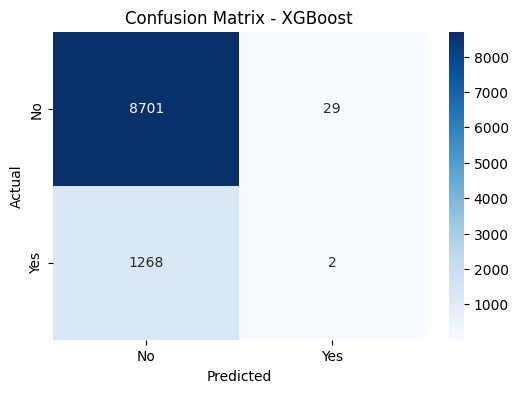

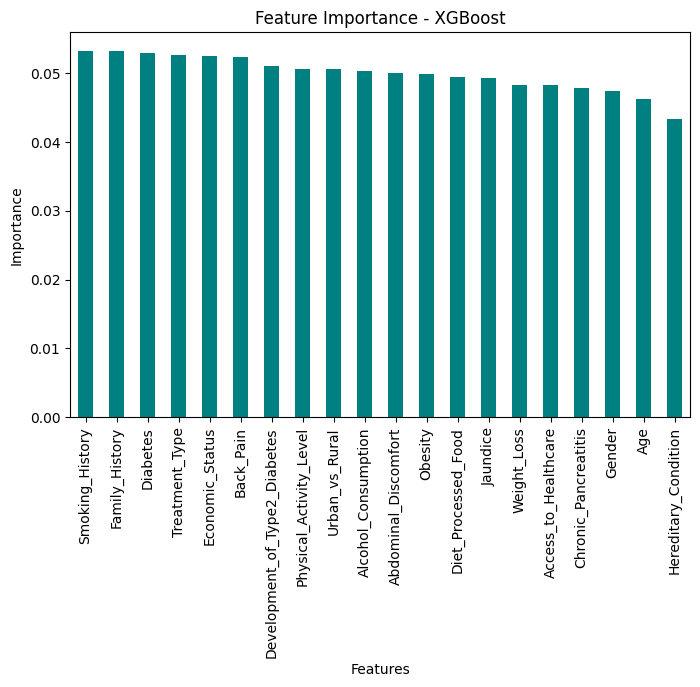

In [21]:
# Training and evaluation
for model_name, model in defined_models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
     # Feature importance (only for tree-based models)
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(8, 5))
        feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        feature_importance.plot(kind='bar', color='teal')
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()


The accurancy of model is 87% which is amezing but, this results are misleading because most of the data belong to class 0 (No cancer). So if the model predict "class 0" for everyone, It will still achieve 87% score.

So when my model select 87%, it's for class 0. Which is correct most of the time.

for class 1:- <br>
0.00 to 0.08 score meaning model is predicting "Cancer" for only 8%(due to less data in dataset). Which makes the model wrong.<br>
Recall = 1. means that model never correctly predicts a cancer case.<br>
F1-score = 0.00 for class 1. confirms  that the model is useless for predicting cancer cases.<br>

<h3>Why this happen?</h3>
- 8730 (No Cancer) vs. 1270 (Cancer) <br>
- ~87% of the dataset is No Cancer.<br>
The models are biased toward predicting the majority class (0).

This could have been an amezing ML but since the dataset is imbalanced meaning, there is no particular path that leads to dead or lived, In medical everything is related to one another which could cause disease. 

Future plan, I think i'll work on this when i learn how to use SMOTE!<br>
maybe after that i could get some different output than this.